In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [7]:
income["SalStat"].value_counts()

SalStat
less than or equal to 50,000    24283
greater than 50,000              7695
Name: count, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

def income_model_data_prep(data):
    data = pd.get_dummies(
        income.assign(
                target = np.where(data["SalStat"]==" less than or equal to 50,000", 0,1),
                nativecountry = data["nativecountry"].str.replace(" Holand-Netherlands",
                                                         " Germany"),
                JobType = data["JobType"].replace({" Never-worked":" Without-pay"}),
                occupation = data["occupation"].str.replace(" Armed-Forces"," ?")
                ).drop("SalStat",axis=1),
        drop_first=True
    )
    X = data.drop(columns=["target"],axis=1)
    y = data["target"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

    return X_train, X_test, y_train, y_test


In [22]:
income = pd.read_csv("../Data/income.csv")

X_train, X_test, y_train, y_test = income_model_data_prep(income)

In [26]:
X_train.shape[0], X_test.shape[0]

(25582, 6396)

### Scaling the features

In [50]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
X_train_std = std.fit_transform(X_train[["age","hoursperweek"]])
X_test_std = std.transform(X_test[["age","hoursperweek"]])

### Fitting a KNN model with k=5

In [51]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_std, y_train)


KNeighborsClassifier()

### Evaluate the model with the model score(accuracy) and confusion matrix

In [52]:
from sklearn.metrics import accuracy_score, confusion_matrix

print(f'Train accuracy: {accuracy_score(y_train, knn.predict(X_train_std))}')
print(f'Test accuracy: {accuracy_score(y_test, knn.predict(X_test_std))}')


Train accuracy: 0.7646391994371042
Test accuracy: 0.7485928705440901


In [58]:
cm_test = confusion_matrix(y_test, knn.predict(X_test_std))
cm_test

array([[4368,  484],
       [1124,  420]])

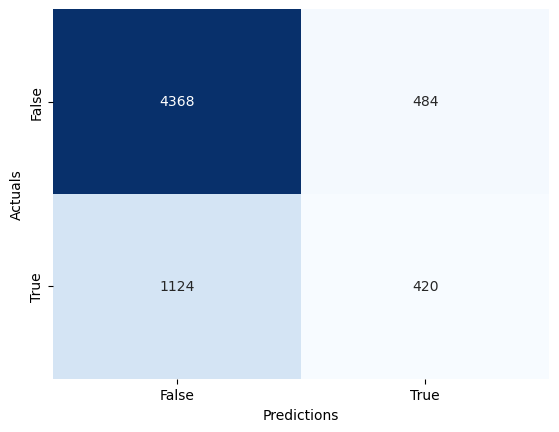

In [60]:
ax = sns.heatmap(
    cm_test,
    cmap='Blues',
    annot=True,
    fmt='g',
    xticklabels=['False','True'],
    yticklabels=['False','True'],
    cbar=False
)
ax.set(xlabel="Predictions",ylabel="Actuals");

### Scatterplot using teh test data with age in x axis and hoursperweek in y and hue as each point in predicted class.

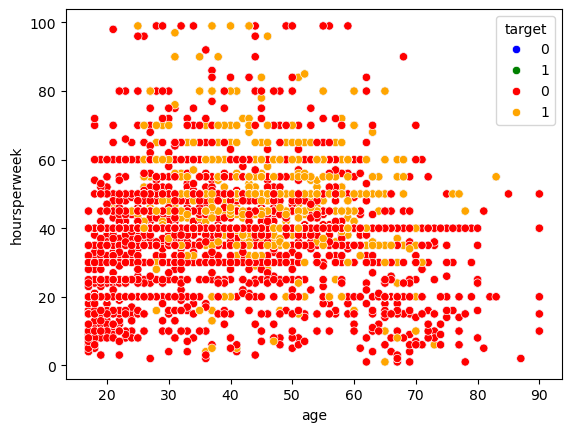

In [69]:
figure, ax = plt.subplots()

cust_palette1 = ["blue","green"]
sns.scatterplot(X_test,x="age",y="hoursperweek",
                hue=knn.predict(X_test_std), palette=cust_palette1, ax=ax)

cust_palette2 = ["red","orange"]
sns.scatterplot(X_test,x="age",y="hoursperweek",
                hue=y_test, palette=cust_palette2, ax=ax)

plt.show();